In [1]:
import numpy
filename = 'power.csv'
raw_data = open(filename, 'rt')
data = numpy.loadtxt(raw_data, delimiter=',')

In [2]:
data.shape

(9568, 5)

In [3]:
data[:10]

array([[  14.96,   41.76, 1024.07,   73.17,  463.26],
       [  25.18,   62.96, 1020.04,   59.08,  444.37],
       [   5.11,   39.4 , 1012.16,   92.14,  488.56],
       [  20.86,   57.32, 1010.24,   76.64,  446.48],
       [  10.82,   37.5 , 1009.23,   96.62,  473.9 ],
       [  26.27,   59.44, 1012.23,   58.77,  443.67],
       [  15.89,   43.96, 1014.02,   75.24,  467.35],
       [   9.48,   44.71, 1019.12,   66.43,  478.42],
       [  14.64,   45.  , 1021.78,   41.25,  475.98],
       [  11.74,   43.56, 1015.14,   70.72,  477.5 ]])

In [4]:
# we import library for plotting

import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [5]:
# separate independent variable into X (features)
# and dependent variable (energy output) into Y
X = data[:,0:4]
y = data[:,4]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654,)
(1914,)


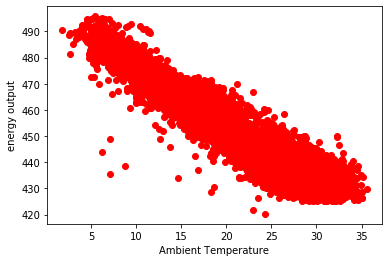

In [11]:
# plot outputs ambient temperature (feature) vs energy output (y)

plt.scatter(X_train[:,0], y_train, color = 'red')
plt.xlabel('Ambient Temperature')
plt.ylabel('energy output')
plt.show()

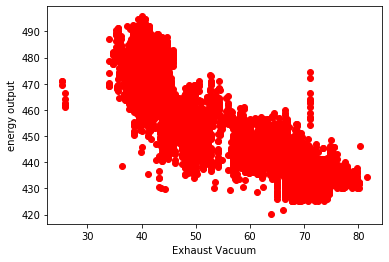

In [14]:
# plot outputs exhaust vacuum (feature) vs energy output (y)

plt.scatter(X_train[:,1], y_train, color = 'red')
plt.xlabel('Exhaust Vacuum')
plt.ylabel('energy output')
plt.show()

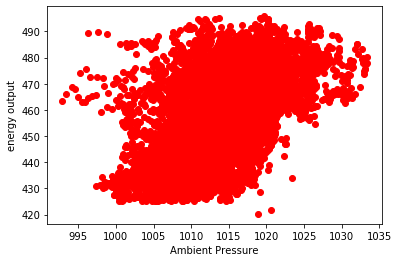

In [15]:
# plot outputs ambient pressure (feature) vs energy output (y)

plt.scatter(X_train[:,2], y_train, color = 'red')
plt.xlabel('Ambient Pressure')
plt.ylabel('energy output')
plt.show()

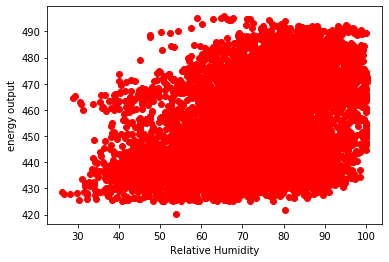

In [17]:
# plot outputs Relative Humidity (feature) vs energy output (y)

plt.scatter(X_train[:,3], y_train, color = 'red')
plt.xlabel('Relative Humidity')
plt.ylabel('energy output')
plt.show()

In [18]:
#create linear regression object
regr = linear_model.LinearRegression()

In [20]:
# TRAIN THE MODEL USING THE TRAINING SETS
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# make predictions using testing set
y_pred = regr.predict(X_test)

In [22]:
# the coefficients
print('Coefficients: \n',regr.coef_)

Coefficients: 
 [-1.98589969 -0.23209358  0.06219991 -0.15811779]


In [23]:
print('Mean squared error: %.2f'
     % mean_squared_error(y_test, y_pred))

Mean squared error: 20.27


In [24]:
# explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.93


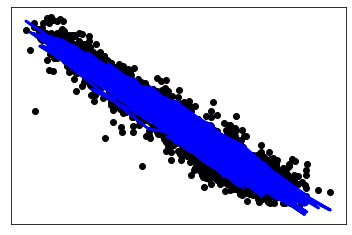

In [25]:
# plot outputs
plt.scatter(X_test[:,0], y_test, color='black')
plt.plot(X_test[:,0], y_pred, color='blue', linewidth = 3)

plt.xticks(())
plt.yticks(())

plt.show()
